# KLASIFIKASI DAUN MENGGUNAKAN CNN

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import os

In [ ]:
%cd /content/gdrive/MyDrive/A.I
!unzip \*.zip  && rm *.zip

/content/gdrive/MyDrive/A.I
Archive:  Dataset_pandan_pepaya_244_239-main.zip
d122e3daa8c5460cbf504c4d3e82cbc0cbeb8c5c
   creating: Dataset_pandan_pepaya_244_239-main/
   creating: Dataset_pandan_pepaya_244_239-main/DATASET/
  inflating: Dataset_pandan_pepaya_244_239-main/DATASET/PANDAN.zip  
 extracting: Dataset_pandan_pepaya_244_239-main/DATASET/PEPAYA.zip  
  inflating: Dataset_pandan_pepaya_244_239-main/README.md  


In [ ]:
%cd /content/gdrive/MyDrive/A.I/Daun_Pandan_Pepaya/DATASET
!unzip \*.zip && rm *.zip

/content/gdrive/MyDrive/A.I/Daun_Pandan_Pepaya/DATASET
Archive:  PANDAN.zip
  inflating: PANDAN/pandan_001-removebg-preview.png  
  inflating: PANDAN/pandan_002-removebg-preview.png  
  inflating: PANDAN/pandan_003-removebg-preview.png  
  inflating: PANDAN/pandan_004-removebg-preview.png  
  inflating: PANDAN/pandan_005-removebg-preview.png  
  inflating: PANDAN/pandan_006-removebg-preview.png  
  inflating: PANDAN/pandan_007-removebg-preview.png  
  inflating: PANDAN/pandan_008-removebg-preview.png  
  inflating: PANDAN/pandan_009-removebg-preview.png  
  inflating: PANDAN/pandan_010-removebg-preview.png  
  inflating: PANDAN/pandan_011-removebg-preview.png  
  inflating: PANDAN/pandan_012-removebg-preview.png  
  inflating: PANDAN/pandan_013-removebg-preview.png  
  inflating: PANDAN/pandan_014-removebg-preview.png  
  inflating: PANDAN/pandan_015-removebg-preview.png  
  inflating: PANDAN/pandan_016-removebg-preview.png  
  inflating: PANDAN/pandan_017-removebg-preview.png  
  infl

In [3]:
base_dir = '/content/gdrive/MyDrive/A.I/Daun_Pandan_Pepaya'
dataset_dir = os.path.join(base_dir, 'DATASET')
train_dir = os.path.join(base_dir, 'Train')
val_dir = os.path.join(base_dir, 'Validation')

In [4]:
dir_pandan = os.path.join(dataset_dir, 'PANDAN/')
dir_pepaya = os.path.join(dataset_dir, 'PEPAYA/')

#TRAIN DIRECTORY
train_pandan_dir = os.path.join(train_dir, 'PANDAN/')
train_pepaya_dir = os.path.join(train_dir, 'PEPAYA/')

#VALIDATION DIRECTORY
val_pandan_dir = os.path.join(val_dir, 'PANDAN/')
val_pepaya_dir = os.path.join(val_dir, 'PEPAYA/')

SPLITTING DATASET INTO TRAIN DATA AND VALIDATION DATA

In [ ]:
import random
from shutil import copyfile

def train_val_split(source, train, val, train_ratio):
  total_size = len(os.listdir(source))
  train_size = int(train_ratio * total_size)
  val_size = total_size - train_size

  randomized = random.sample(os.listdir(source), total_size)
  train_files = randomized[0:train_size]
  val_files = randomized[train_size:total_size]

  for i in train_files:
    i_file = source + i
    destination = train + i
    copyfile(i_file, destination)

  for i in val_files:
    i_file = source + i
    destination = val + i
    copyfile(i_file, destination)

train_ratio = 0.7

source_0 = dir_pandan
train_0 = train_pandan_dir
val_0 = val_pandan_dir
train_val_split(source_0, train_0, val_0, train_ratio)

source_1 = dir_pepaya
train_1 = train_pepaya_dir
val_1 = val_pepaya_dir
train_val_split(source_1, train_1, val_1, train_ratio)

#AUGMENTASI DATASET

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1. / 255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)



In [7]:
train_generator = train_datagen.flow_from_directory(
                  train_dir,
                  batch_size=16,
                  class_mode='categorical',
                  target_size=(180,180))

val_generator = val_datagen.flow_from_directory(
                val_dir,
                batch_size=16,
                class_mode='categorical',
                target_size=(180,180))


Found 70 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


# ARSITEKTUR MODELS

In [8]:
import tensorflow as tf
from tensorflow.keras import layers, Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, Activation, MaxPooling2D, Dropout, Flatten, Dense

In [15]:
model = Sequential()
model.add(Conv2D(128, (3, 3), padding='same', input_shape=(180, 180, 3)))

model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(train_generator.num_classes))
model.add(Activation('softmax'))

In [16]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 180, 180, 128)     3584      
                                                                 
 activation_16 (Activation)  (None, 180, 180, 128)     0         
                                                                 
 conv2d_13 (Conv2D)          (None, 178, 178, 32)      36896     
                                                                 
 activation_17 (Activation)  (None, 178, 178, 32)      0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 89, 89, 32)       0         
 2D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 89, 89, 32)        0         
                                                      

In [17]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
history = model.fit(train_generator,
        steps_per_epoch=5,
        epochs=5,
        validation_data=val_generator,
        validation_steps=1, 
        shuffle=True,
        verbose = 1)

Epoch 1/5
5/5 [==============================] - 20s 4s/step - loss: 1.0418 - accuracy: 0.5571 - val_loss: 0.6547 - val_accuracy: 0.9375
Epoch 2/5
5/5 [==============================] - 19s 4s/step - loss: 0.6073 - accuracy: 0.5857 - val_loss: 0.4787 - val_accuracy: 0.8125
Epoch 3/5
5/5 [==============================] - 19s 4s/step - loss: 0.1963 - accuracy: 0.9857 - val_loss: 0.0130 - val_accuracy: 1.0000
Epoch 4/5
5/5 [==============================] - 19s 4s/step - loss: 0.0083 - accuracy: 1.0000 - val_loss: 3.1516e-06 - val_accuracy: 1.0000
Epoch 5/5
5/5 [==============================] - 20s 5s/step - loss: 2.1746e-06 - accuracy: 1.0000 - val_loss: 7.4506e-09 - val_accuracy: 1.0000


Text(0.5, 1.0, 'Training and validation loss')

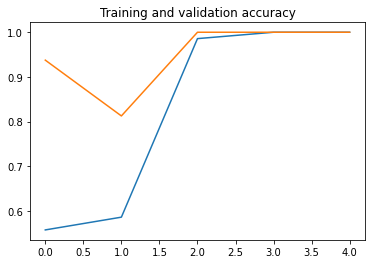

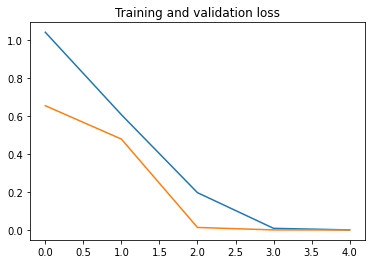

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt

acc      = history.history['accuracy']
val_acc  = history.history['val_accuracy']
loss     = history.history['loss']
val_loss = history.history['val_loss']

epochs   = range(len(acc))

plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()


plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )

In [20]:
print('Accuracy : ',acc)

Accuracy :  [0.5571428537368774, 0.5857142806053162, 0.9857142567634583, 1.0, 1.0]


In [26]:
model.save('/content/gdrive/MyDrive/A.I/models.h5')

Saving pandan_050-removebg-preview.png to pandan_050-removebg-preview.png
1/1 [==============================] - 0s 87ms/step
pandan_050-removebg-preview.png
Daun PANDAN


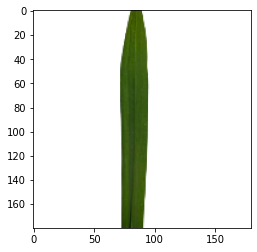

In [25]:
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  path = fn
  img = load_img(path, target_size = (180, 180))
  imgplot = plt.imshow(img)
  x = img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 16)

  print(fn)

  class_list = os.listdir(train_dir)

  for j in range(42):
    if classes[0][j] == 1. :
      print('Daun',class_list[j])
      break